##  Advanced Topics in ML & DM
### Nicolas Rojas
##  Report Time Series Classification: ROCKET

### Introduction

ROCKET (for RandOm Convolutional KErnel Transform) is a time series classification approach that uses random convolutional kernels so as to transform a time series into features useful for a linear classifier. 

This work shows a comparison beetween ROCKET, and other algorithms for Time Series Classification, as SAST, HIVE-COTE, ST and Catch22. Most of these methods are implemented in Python through the sktime framework.

In order to compare results obtained for the different aproaches, the algorithms were applied uniquely to the Chinatown Dataset. This dataset contains pedestrian count in Chinatown-Swanston St North for 12 months of the year 2017. Furthermore, classes, for this dataset, are based on whether data are from a normal day or a weekend day (Class 1: Weekend - Class 2: Weekday).

The implementation of the different methods were performed locally using an Intel Core i7-6820HQ CPU @ 2.70GHz processor.

### Exploratory data analysis Dataset:


In [1]:
from sktime.datasets import load_UCR_UEA_dataset
from sktime.classification.kernel_based import RocketClassifier
import time
import numpy as np
import pandas as pd
from sast.sast import znormalize_array,from_2d_array_to_nested
import matplotlib.pyplot as plt
from sktime.datasets import tsc_dataset_names

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


In [2]:
max_ds=len(tsc_dataset_names.univariate_equal_length) #exploring dataset in UEA & UCR Time Series Classification Repository
print(tsc_dataset_names.univariate_equal_length)


['ACSF1', 'Adiac', 'ArrowHead', 'Beef', 'BeetleFly', 'BirdChicken', 'BME', 'Car', 'CBF', 'Chinatown', 'ChlorineConcentration', 'CinCECGTorso', 'Coffee', 'Computers', 'CricketX', 'CricketY', 'CricketZ', 'Crop', 'DiatomSizeReduction', 'DistalPhalanxOutlineCorrect', 'DistalPhalanxOutlineAgeGroup', 'DistalPhalanxTW', 'Earthquakes', 'ECG200', 'ECG5000', 'ECGFiveDays', 'ElectricDevices', 'EOGHorizontalSignal', 'EOGVerticalSignal', 'EthanolLevel', 'FaceAll', 'FaceFour', 'FacesUCR', 'FiftyWords', 'Fish', 'FordA', 'FordB', 'FreezerRegularTrain', 'FreezerSmallTrain', 'Fungi', 'GunPoint', 'GunPointAgeSpan', 'GunPointMaleVersusFemale', 'GunPointOldVersusYoung', 'Ham', 'HandOutlines', 'Haptics', 'Herring', 'HouseTwenty', 'InlineSkate', 'InsectEPGRegularTrain', 'InsectEPGSmallTrain', 'InsectWingbeatSound', 'ItalyPowerDemand', 'LargeKitchenAppliances', 'Lightning2', 'Lightning7', 'Mallat', 'Meat', 'MedicalImages', 'MiddlePhalanxOutlineCorrect', 'MiddlePhalanxOutlineAgeGroup', 'MiddlePhalanxTW', 'Mixe

In [3]:
ds='Chinatown' # Chosing a dataset from # Number of classes to consider
X_train, y_train = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")

classes = np.unique(y_train)
max_class_to_plot = min(3, len(classes)) # Number of classes to consider

print("shape train DS:", X_train.shape) # Shape of the dataset


shape train DS: (20, 24)


In [4]:
X_train=znormalize_array(X_train) # Normalize train dataset
X_test=znormalize_array(X_test) # Normalize test dataset


classes: ['1' '2'] count_per_classes= 5 max_class_to_plot= 2
i= 0 c= 1
y_train==c: [0 1 2 3 4 5 6 7 8 9]
ts_indices: [6 8 3 2 4 5]
1.5824260556356549
2.356104561491281
2.1795856790873276
0.8970069909820053
0.718610248126946
i= 1 c= 2
y_train==c: [10 11 12 13 14 15 16 17 18 19]
ts_indices: [18 15 10 17 14 16]
1.0453579666193706
1.2857241043609244
1.188075360903418
1.2012203840611593
2.149539911869633


Text(0.5, 1.0, 'Class: ?')

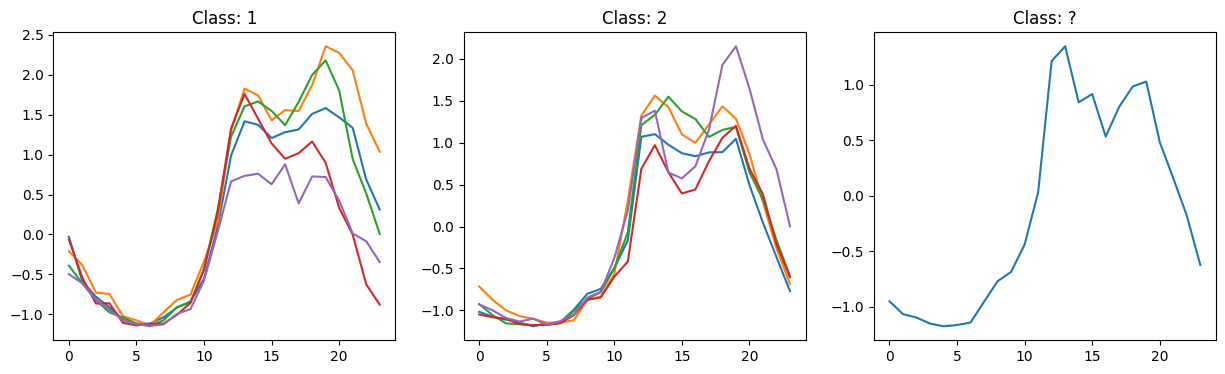

In [5]:
count_per_classes = 5 # Number of instances to plot per each class

print("classes:",classes,"count_per_classes=", count_per_classes,"max_class_to_plot=", max_class_to_plot)

plt.figure(figsize=(15, 4))

for i, c in enumerate(classes[:max_class_to_plot]):
    print ("i=",i,"c=",c)
    print ("y_train==c:",np.where(y_train==c)[0])
    ts_indices = np.random.choice(np.where(y_train==c)[0], size=count_per_classes+1, replace=False)
    print ("ts_indices:",ts_indices)
    plt.subplot(1, max_class_to_plot+1, i+1)
    
    for idx in ts_indices[:-1]:
        plt.plot((X_train[idx]))
        print(X_train[idx][19])
    plt.title(f'Class: {c}')
    
plt.subplot(1, max_class_to_plot+1, i+2)
plt.plot((X_train[ts_indices[-1]]))
plt.title(f'Class: ?')

i= 0 c= 1

y_train==c: [0 1 2 3 4 5 6 7 8 9]
ts_indices: [4 5 9 6 3 7 8 2 1 0]
i= 1 c= 2

y_train==c: [10 11 12 13 14 15 16 17 18 19]
ts_indices: [12 14 11 10 17 15 18 16 13 19]
n hist_sample_per_class_0: [31. 10.  8.  9.  3.  9. 11.  3. 12.  4.]
n sum_class_0: 100.0
bins hist_sample_per_class_0: [-1.06451214 -0.75674959 -0.44898704 -0.1412245   0.16653805  0.4743006
  0.78206315  1.0898257   1.39758825  1.7053508   2.01311335]
n hist_sample_per_class_1: [35. 10.  5.  8. 10. 11.  8.  8.  4.  1.]
n sum_class_1: 100.0
bins hist_sample_per_class_1: [-1.06451214 -0.75674959 -0.44898704 -0.1412245   0.16653805  0.4743006
  0.78206315  1.0898257   1.39758825  1.7053508   2.01311335]
differences: [-4.0, 0.0, 3.0, 1.0, -7.0, -2.0, 3.0, -5.0, 8.0, 3.0]


Text(0, 0.5, 'Difference')

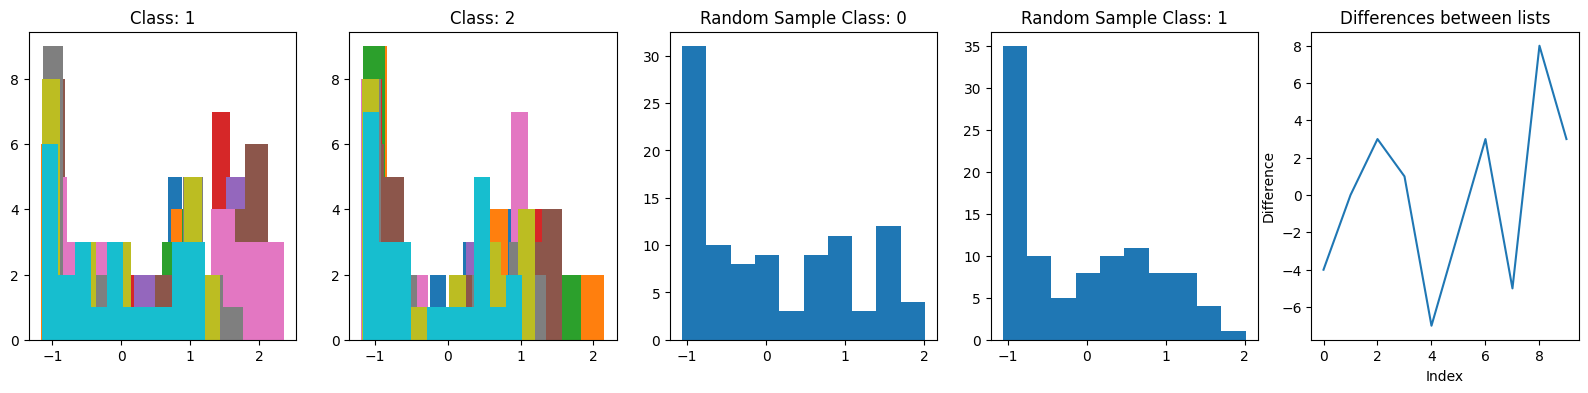

In [6]:
plt.figure(figsize=(20, 4))

random_sample_per_class= {}

count_per_classes = 10 # Number of instances to plot per each class
size_bin = 10
size_sample = 10

for i, c in enumerate(classes[:max_class_to_plot]):
    random_sample=[]
    print ("i=",i,"c=",c+"\n")
    print ("y_train==c:",np.where(y_train==c)[0])
    ts_indices = np.random.choice(np.where(y_train==c)[0], size=count_per_classes, replace=False)
    print ("ts_indices:",ts_indices)
    plt.subplot(1, max_class_to_plot+3, i+1)
    
    for idx in ts_indices:  
        # Create a histogram from the data
        hist_X_train = plt.hist(X_train[idx], bins=size_bin, density=False)
        n, bins, patches = hist_X_train
        hist_X_train
        
        # Get the weights (probabilities) associated with each bin
        weights = n / n.sum()

        # Generate a sample of specified size of selected random values from the weights
        values = (bins[:-1] + bins[1:]) / 2        
        choise_rand = np.random.choice(values, size_sample, p=weights)
        random_sample.extend(choise_rand)

    random_sample_per_class[c]=random_sample
    random_sample_per_class = pd.Series( random_sample_per_class )
    plt.title(f'Class: {c}')
    
plt.subplot(1, max_class_to_plot+3, i+2)



max_list=max(max(random_sample_per_class.iloc[0]), max(random_sample_per_class.iloc[1]))
min_list=min(min(random_sample_per_class.iloc[0]), min(random_sample_per_class.iloc[1]))


hist_sample_per_class_0=plt.hist(random_sample_per_class.iloc[0], bins=size_bin, density=False, range=(min_list,max_list))
hist_sample_per_class_0
print("n hist_sample_per_class_0: "+str(hist_sample_per_class_0[0]))
print("n sum_class_0: "+str(hist_sample_per_class_0[0].sum()))
print("bins hist_sample_per_class_0: "+str(hist_sample_per_class_0[1]))
plt.title(f'Random Sample Class: 0')

plt.subplot(1, max_class_to_plot+3, i+3)
hist_sample_per_class_1=plt.hist(random_sample_per_class.iloc[1], bins=size_bin, density=False, range=(min_list,max_list))
hist_sample_per_class_1
print("n hist_sample_per_class_1: "+str(hist_sample_per_class_1[0]))
print("n sum_class_1: "+str(hist_sample_per_class_0[0].sum()))
print("bins hist_sample_per_class_1: "+str(hist_sample_per_class_1[1]))
plt.title(f'Random Sample Class: 1')

plt.subplot(1, max_class_to_plot+3, i+4)

differences = [i-j for i, j in zip(hist_sample_per_class_0[0], hist_sample_per_class_1[0])]

plt.plot(differences)
print("differences: "+str(differences))
plt.title("Differences between lists")
plt.xlabel("Index")
plt.ylabel("Difference")


In [7]:
from scipy.stats import f_oneway
#create dictionary for values in time t for each class
statistic_per_class= {}
n = []
for i in range (X_train.shape[1]):
    for c in classes:
        
        statistic_per_class[c]=X_train[np.where(y_train==c)[0]][:,i]
        
    statistic_per_class=pd.Series(statistic_per_class)
    # Calculate t-statistic and p-value
    t_statistic, p_value = f_oneway(*statistic_per_class)
    n.append(1-p_value)
    # Interpret the results
    if p_value < 0.05:
        print(str(i)+" The means of the populations are significantly different."+str(p_value))
    else:
        print(str(i)+" The means of the populations are not significantly different."+str(p_value))


0 The means of the populations are significantly different.1.4388728536203488e-09
1 The means of the populations are significantly different.5.563639979642921e-11
2 The means of the populations are significantly different.3.096850827014565e-07
3 The means of the populations are significantly different.4.5166427193856536e-08
4 The means of the populations are significantly different.4.157965816033617e-05
5 The means of the populations are significantly different.0.0002635364385776942
6 The means of the populations are not significantly different.0.16106885736559645
7 The means of the populations are significantly different.0.01548962736515788
8 The means of the populations are significantly different.7.29849400970033e-05
9 The means of the populations are significantly different.0.00026463361092357
10 The means of the populations are not significantly different.0.7035822312235923
11 The means of the populations are not significantly different.0.12323212907079956
12 The means of the popu

i= 0 c= 1

pacf_confint 0 1.0 [1. 1.]
pacf_confint 1 0.9422624087524223 [0.54218644 1.34233838]
pacf_confint 2 -0.6981019548091488 [-1.09817793 -0.29802598]
pacf_confint 3 0.06911465926584281 [-0.33096131  0.46919063]
pacf_confint 4 -0.05935113398993935 [-0.45942711  0.34072484]
pacf_confint 5 -0.21152862797128386 [-0.6116046   0.18854735]
pacf_confint 6 -0.04109189979068639 [-0.44116787  0.35898407]
pacf_confint 7 -0.5637571340711158 [-0.96383311 -0.16368116]
pacf_confint 8 -0.3463421410829983 [-0.74641811  0.05373383]
pacf_confint 9 0.04455282494701594 [-0.35552315  0.4446288 ]
pacf_confint 10 -0.27301168449264934 [-0.67308766  0.12706429]
pacf_confint 11 0.6955838728113618 [0.2955079  1.09565985]
i= 1 c= 2

pacf_confint 0 1.0 [1. 1.]
pacf_confint 1 0.918643146345626 [0.51856717 1.31871912]
pacf_confint 2 -0.4856307864526388 [-0.88570676 -0.08555481]
pacf_confint 3 -0.17595442096263214 [-0.57603039  0.22412155]
pacf_confint 4 -0.06385268494779317 [-0.46392866  0.33622329]
pacf_confin

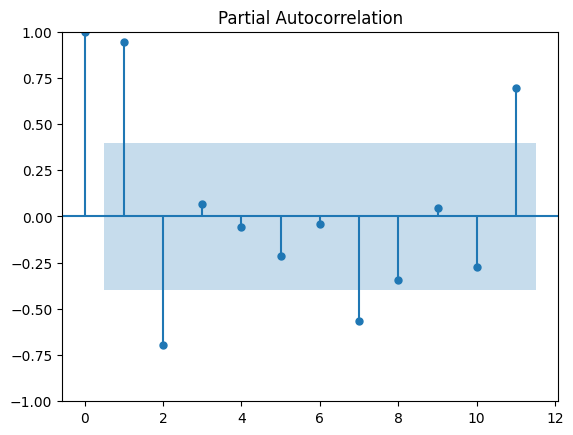

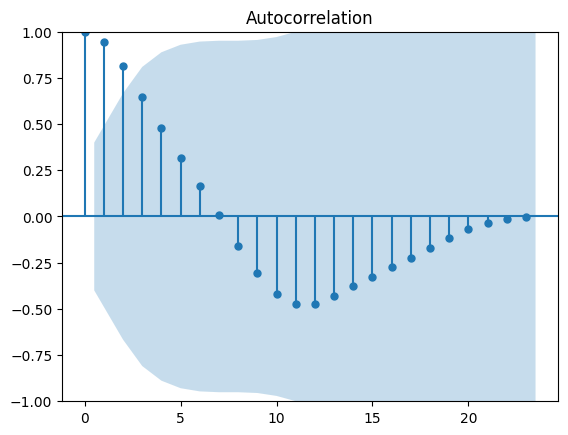

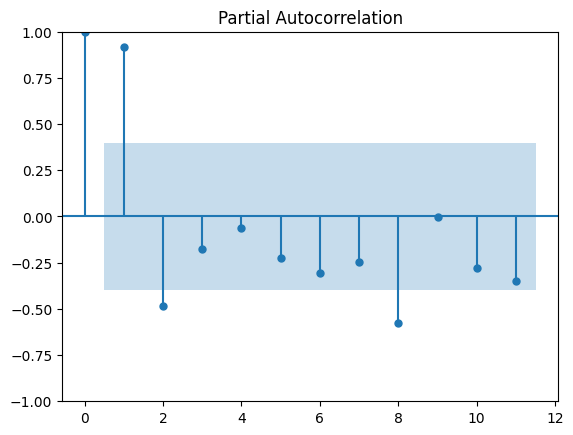

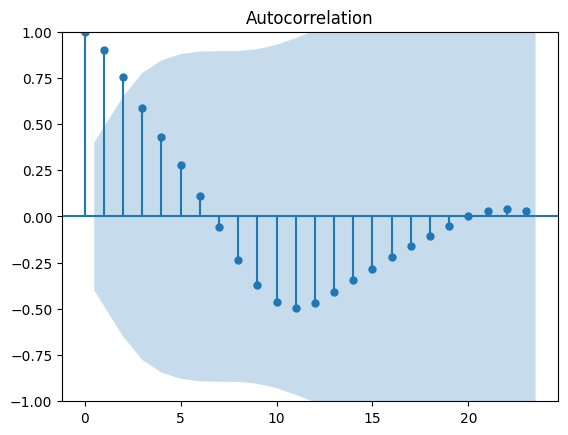

In [8]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import acf,pacf
#import statsmodels.api as sm
count_per_classes = 1 # Number of instances to plot per each class


weights = n / sum(n)
num_sig_lags_per_class = {}

param_sast = {}
list_classes =[]
list_starting_point =[]
list_lags_acf =[]
list_lags_pacf =[]

for i, c in enumerate(classes):
    print ("i=",i,"c=",c+"\n")
    
    ts_indices = np.random.choice(np.where(y_train==c)[0], size=count_per_classes, replace=False)
    for idx in ts_indices:
        # Determine PACF
        pacf_val, pacf_confint = pacf(X_train[idx], method="ols", nlags=0.5*len(X_train[idx])-1,  alpha=.05)
        pacf_plot=plot_pacf(X_train[idx], method="ols", lags=0.5*len(X_train[idx])-1)
        # Determine ACF
        acf_val, acf_confint = acf(X_train[idx], nlags=len(X_train[idx])-1,  alpha=.05)
        acf_plot = plot_acf(X_train[idx], lags=len(X_train[idx])-1)
        

        #z_value, p_values = sm.stats.diagnostic.acorr_ljungbox(X_train[idx], lags=np.arange(1, len(X_train[idx])), return_df=False)
        
        # Determine the significant lagged values (excluding below 3)
        non_zero_pacf=[]
        for j, conf in enumerate(pacf_confint):
            print( "pacf_confint",j, pacf_val[j], pacf_confint[j])
            if(3<=j and (0 < pacf_confint[j][0] <= pacf_confint[j][1] or pacf_confint[j][0] <= pacf_confint[j][1] < 0) ):
                non_zero_pacf.append(j)
        
        non_zero_acf=[]
        for j, conf in enumerate(acf_confint):
            
            if(3<=j and (0 < acf_confint[j][0] <= acf_confint[j][1] or acf_confint[j][0] <= acf_confint[j][1] < 0) ):
                print( "acf_confint",j,acf_val[j], acf_confint[j])
                non_zero_acf.append(j)
        if len(non_zero_acf) > 0 :
            num_sig_lags = max(non_zero_acf)
        else:
            num_sig_lags = 3

        # Determine the weights of starting point for the subsequences to choose randomly
        weights = n[:len(X_train[idx])-num_sig_lags+1] / sum(n[:len(X_train[idx])-num_sig_lags+1])
        # Choose randomly the starting point having into accounts the previous weights
        start_point = np.random.choice(len(X_train[idx])-num_sig_lags+1,1,p=weights)[0]
        # Extract the subsequence
        kernel = X_train[idx][start_point:start_point+num_sig_lags]
        
        list_classes.append(c)
        list_starting_point.append(start_point)
        list_lags_pacf.append(non_zero_pacf)
        list_lags_acf.append(non_zero_acf)
        num_sig_lags_per_class[c]=kernel
        #print (list_classes)
        #print (list_starting_point)
        #print (list_lags)

param_sast['c']=list_classes
param_sast['start_point']=list_starting_point
param_sast['num_sig_lags_acf']=list_lags_acf
param_sast['num_sig_lags_pacf']=list_lags_pacf

print (param_sast)



Firstly, in order to apply ROCKET to the Chinatown dataset (which contains 20 TS objects of length 24), the libraries "load_UCR_UEA_dataset" and "RocketClassifier" are imported. 

An instance of "RocketClassifier" is created (with 10.000 kernels) and fitted with the training dataset. This step takes a duration of aprox. 7s and the accuracy of the model (#correct_preds / #all_preds) was 0.9825, using the testing dataset.

In [9]:
from sktime.classification.kernel_based import RocketClassifier
start = time.time()
rocket= RocketClassifier(num_kernels=10_000)
rocket.fit(X_train,y_train)
print('score:',rocket.score(X_test,y_test))
end = time.time()

print('duration:', end-start)

score: 0.9825072886297376
duration: 1.8800067901611328


### Using iSAST on Chinatown Dataset:


Additionally, for the Chinatown dataset the SAST algorithm was applied. This implementation was cloned from the following URL: https://github.com/frankl1/sast

In [10]:
from sast.utils import *
from sast.sast import *
from sktime.datasets import load_UCR_UEA_dataset
import time

ds='Chinatown' # Chosing a dataset from # Number of classes to consider

X_train, y_train = load_UCR_UEA_dataset(name=ds, extract_path='data', split="train", return_type="numpy2d")
X_test, y_test = load_UCR_UEA_dataset(name=ds, extract_path='data', split="test", return_type="numpy2d")

start = time.time()
random_state = None
#ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
#isast_ridge = iSAST(nb_inst_per_class=1, 
#                          random_state= random_state, classifier=ridge)

# optimal combination: n_random_points=10,nb_inst_per_class=100
rsast_ridge = RSAST(n_random_points=100,nb_inst_per_class=1, classifier=RidgeClassifierCV())
rsast_ridge.fit(X_train, y_train)
print('score:', rsast_ridge.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

score: 0.9387755102040817
duration: 4.38047194480896


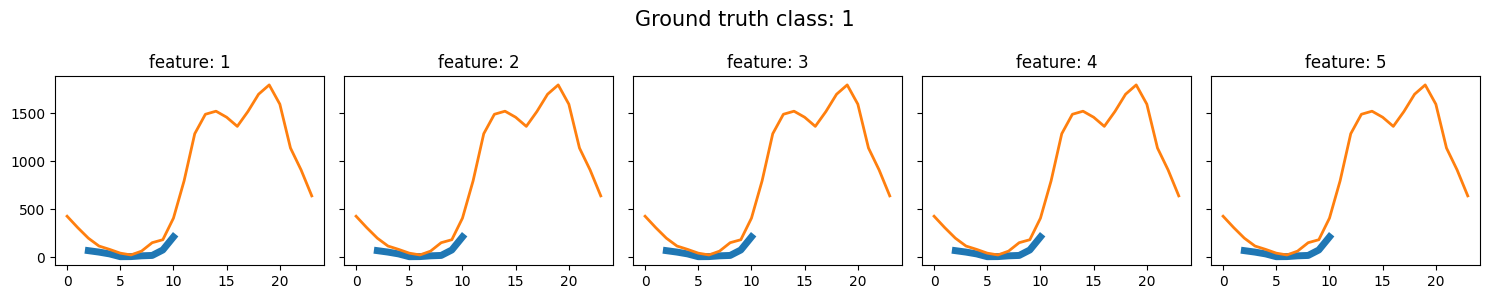

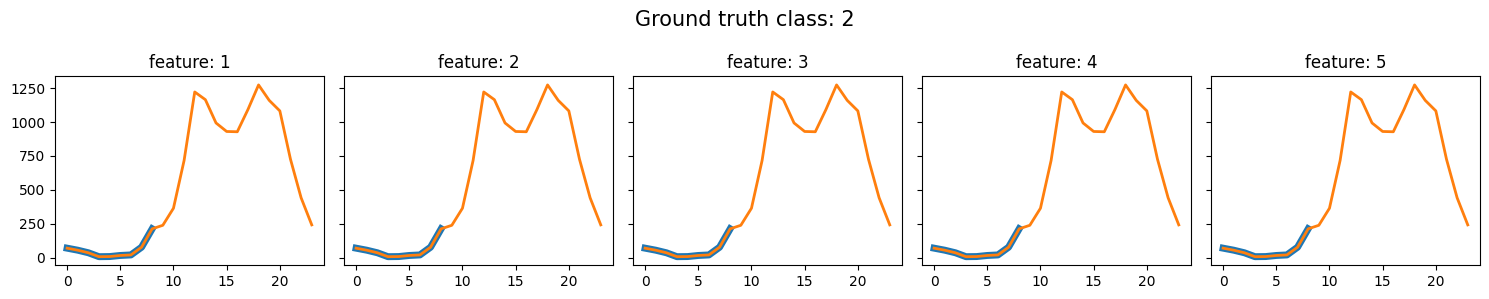

In [11]:
for c, ts in rsast_ridge.kernels_generators_.items():
    fname = f'images/chinatown-iridge-class{c}-top5-features-on-ref-ts.jpg'
    #print(c,ts.squeeze().shape )
    #print(isast_ridge.kernel_orig_[0])
    #print(isast_ridge.classifier.coef_[0][0])
    plot_most_important_feature_on_ts(ts.squeeze(), c, rsast_ridge.kernel_orig_, rsast_ridge.classifier.coef_[0], limit=5, offset=0, fname=fname) # plot only the first model one-vs-all model's features


### Using SAST on Chinatown Dataset:

Additionally, for the Chinatown dataset the SAST algorithm was applied. This implementation was cloned from the following URL: https://github.com/frankl1/sast

In [12]:
min_shp_length = 3
max_shp_length = X_train.shape[1]

candidate_lengths = np.arange(min_shp_length, max_shp_length+1)
nb_inst_per_class = 1
print('candidate_lengths:',candidate_lengths)

candidate_lengths: [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


SAST was used in combination with a ridge classifier, obtaining an accuracy of 0.9 approximately. Additionally, the time to create the Ridge Classifier instance, the SAST instance and fitting the model was of about 1s.

In [13]:
start = time.time()
random_state = None
ridge = RidgeClassifierCV(alphas = np.logspace(-3, 3, 10))
sast_ridge = SAST(cand_length_list=candidate_lengths,
                          nb_inst_per_class=1, 
                          random_state= random_state, classifier=ridge)
sast_ridge.fit(X_train, y_train)
print('score:', sast_ridge.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

score: 0.9475218658892128
duration: 0.9661064147949219


1 (1, 24)
-0.012140756969375676


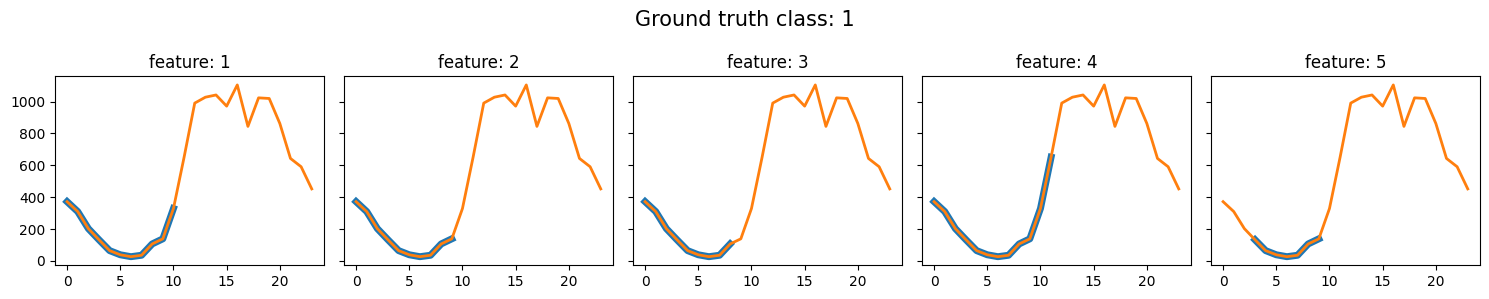

2 (1, 24)
-0.012140756969375676


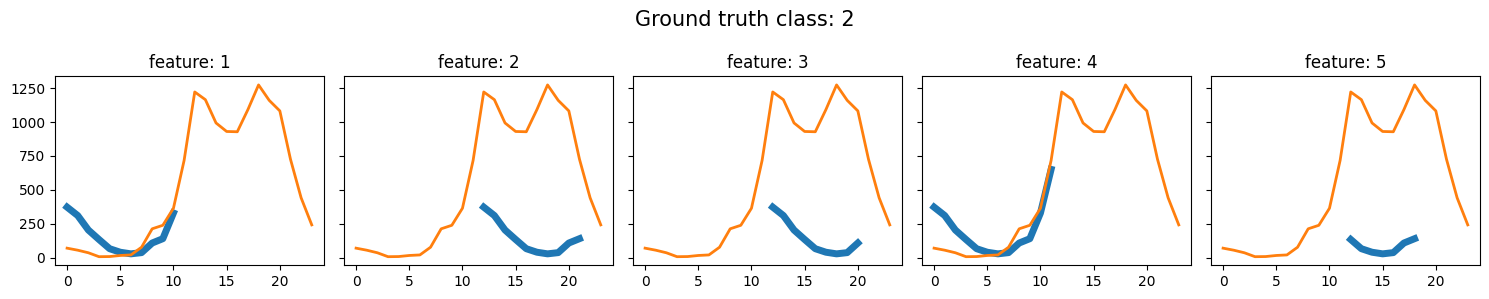

In [14]:
for c, ts in sast_ridge.kernels_generators_.items():
    fname = f'images/chinatown-ridge-class{c}-top5-features-on-ref-ts.jpg'
    print(c,ts.shape )
    print(min(sast_ridge.classifier.coef_[0]))
    plot_most_important_feature_on_ts(ts.squeeze(), c, sast_ridge.kernel_orig_, sast_ridge.classifier.coef_[0], limit=5, offset=0, fname=fname) # plot only the first model one-vs-all model's features


### Using SASTEN on Chinatown Dataset:

SASTEN consist of an ensamble of SAST models. SASTEN, also was applied to the Chinatown dataset with a "RandomForestClassifier". Particularly, the implementation of "ShapeletTransform" was imported directly from sktime library.

Applying SASTEN...

In [15]:
candidate_length_list = [list(range(3, 10)), list(range(10, 17)), list(range(17, 24))]
clf = RidgeClassifierCV(alphas=np.logspace(-3, 3, 10))
#clf = RandomForestClassifier(min_impurity_decrease=0.05, max_features=None)
saste = SASTEnsemble(cand_length_list=candidate_length_list,
                          nb_inst_per_class=nb_inst_per_class, 
                          random_state=random_state, classifier=clf, n_jobs = -1)

start = time.time()

saste.fit(X_train, y_train)

print('Score:', saste.score(X_test, y_test))

end = time.time()

print('duration:', end-start)

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/mass_ts/_mass_ts.py:17: UserWarning: GPU support will not work. You must pip install mass-ts[gpu].
  warnings.warn(


Score: 0.9591836734693877
duration: 5.469886541366577


### Using Shapelet Transform on Chinatown Dataset:

Similar to SAST, Shapelet transform (ST) consist of a separate process for the classification. ST was applied to the Chinatown dataset with a "RandomForestClassifier". Particularly, the implementation of "ShapeletTransform" was imported directly from sktime library.

In [16]:
from sktime.transformations.panel.shapelet_transform import ShapeletTransform

Applying ST algorithm, it was obtained a score of 0.97 in 1m40s approx. This difference in time, compared to SAST, it is due to the fact, that in SAST, time series are chosen randomly for each class, in order to find the best subsequences that allows to make the classification.

In [17]:
start = time.time()
#Creating a ShapeletTransform and fitting
st = ShapeletTransform(min_shapelet_length=min_shp_length, max_shapelet_length=np.inf)
X_train_sktime = from_2d_array_to_nested(pd.DataFrame(X_train))
X_test_sktime = from_2d_array_to_nested(pd.DataFrame(X_test))
st.fit(X_train_sktime, y_train)
#Making the tranformation of time series and training a RandomForestClassifier model
X_test_transformed = st.transform(X_test_sktime)
X_train_transformed = st.transform(X_train_sktime)
clf = RandomForestClassifier()
clf.fit(X_train_transformed, y_train)

print('Score:', clf.score(X_test_transformed, y_test))
end = time.time()

print('duration:', end-start)

Score: 0.9737609329446064
duration: 63.490103244781494


### Using Catch22 on Chinatown Dataset:

Catch22 stands for Canonical Time-series Characteristics and it consist on transforming series into the 22 features, extracted from the hctsa toolbox. This approach is also available in sktime library and it was used it with the Chinatown dataset.

In [18]:
from sktime.classification.feature_based import Catch22Classifier

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/sktime/utils/validation/_dependencies.py:143: UserWarning: No module named 'tsfresh'. 'tsfresh' is a soft dependency and not included in the base sktime installation. Please run: `pip install tsfresh` to install the tsfresh package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/sktime/utils/validation/_dependencies.py:143: UserWarning: No module named 'esig'. 'esig' is a soft dependency and not included in the base sktime installation. Please run: `pip install esig` to install the esig package. To install all soft dependencies, run: `pip install sktime[all_extras]`
  warnings.warn(msg)


This approach got an score of 0.90 in accuracy and the process of creating Catch22Classifier instance and fitting the model took 32.6s approx.

In [19]:
start = time.time()

catch = Catch22Classifier()
catch.fit(X_train,y_train)

print('score:', catch.score(X_test, y_test))
end = time.time()

print('duration:', end-start)
catch.get_param_names()

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:714: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/sktime/datatypes/_panel/_convert.py:714: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for _label, _series in multi_ind_dataframe.iteritems():  # noqa


score: 0.9358600583090378
duration: 21.782194137573242


['estimator', 'n_jobs', 'outlier_norm', 'random_state', 'replace_nans']

### Using HIVE-COTE on Chinatown Dataset:

Lastly, HIVE-COTE is another time series classification algorithm that was applied to the Chinatown dataset. This approach is an ensemble of the STC, TSF, RISE and cBOSS classifiers. The library used for this implementation was sktime, in particular, the hybrid classification methods.

Due to the characteristic of the Chinatown dataset the algorithm takes too much time to fitting the training data and because of that it was not included the results.

In [21]:
from sktime.classification.hybrid import HIVECOTEV2

In [22]:
start = time.time()
hive= HIVECOTEV2( n_jobs=-1)
hive.fit(X_train, y_train)
#print(st.get_params())
#print('score:', hive.score(X_test, y_test))
end = time.time()

print('duration:', end-start)

/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/numba/typed/typeddict.py:53: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  return d.get(key, default)
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/numba/typed/typeddict.py:53: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  return d.get(key, default)
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/numba/typed/typeddict.py:53: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  return d.get(key, default)
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/numba/typed/typeddict.py:33: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may be lost.
  d[key] = value
/home/nirojasvar/anaconda3/envs/rsast_env/lib/python3.10/site-packages/numba/typed/typeddict.py:53: NumbaTypeSafetyWarning: unsafe cast from int64 to uint32. Precision may 

duration: 7363.982157230377


### Conclusions

To sum up the method with the highest accuracy was ROCKET which got 0.9825 as score. However, other approaches, like SAST also achieves high accuracy in a short time frame. The simplicity in the hyperparameter tuning can make a diference between choosing one algorithm or another, but also, the selection of the method depends on the diferent datasets that could be used to training the models.